# Delivery Date Prediction

## Problem Definition

In the visualization before, we can see that we can't predict the delivery time properly and caused less customer satisfaction. In this case, we want to remodel the estimated time delivery using some models.

#Data Preparation

### Import Library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df_customers = pd.read_csv("https://gist.githubusercontent.com/Kaniku/6dd21d0ebf13f47aa021a303ef31692a/raw/38cee16f1a973d21ea2d4c12956a7bc3be4c33ab/dim_customer.csv")
df_sellers = pd.read_csv("https://gist.githubusercontent.com/Kaniku/fe0c61ae0dcb59165fd04bc98ec7dc53/raw/fe04980e49eaa873094f383556eeecbbf41f53b8/dim_seller.csv")
df_orders = pd.read_csv("https://gist.githubusercontent.com/Kaniku/2fb2bc8446c6f198691036a134d9def9/raw/078548028dedfdbd28ef9f09147255e3d82ce583/fact_order.csv")
df_products = pd.read_csv("https://gist.githubusercontent.com/Kaniku/0d6c248b6b11e5c4700a326ba7b93724/raw/5137aee7b5f9991af72a4939d5ee090512ce791d/dim_products.csv")

### Overview Data

In [3]:
df_customers.head()

,customer_key,user_name,customer_zip_code,customer_city,customer_state
0,1,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,KOTA TANGERANG,BANTEN
1,2,968f6d2f674977d88a4b445a5117ccd8,1004,KOTA TANGERANG,BANTEN
2,3,095e7c124c5c1ccb1eb9f731152eae6a,1004,KOTA TANGERANG,BANTEN
3,4,84a7776f914ff19505e44effba86455f,1005,KOTA TANGERANG,BANTEN
4,5,ded4351942c7fc292b88e5b090af2b46,1005,KOTA TANGERANG,BANTEN


In [4]:
df_sellers.head()

,seller_key,seller_id,seller_zip_code,seller_city,seller_state
0,0,0,0,UNKNOWN,UNKNOWN
1,1,0015a82c2db000af6aaaf3ae2ecb0532,9080,KABUPATEN BOGOR,JAWA BARAT
2,2,001cca7ae9ae17fb1caed9dfb1094831,29156,KOTA PEMATANG SIANTAR,SUMATERA UTARA
3,3,001e6ad469a905060d959994f1b41e4f,24754,KOTA DENPASAR,BALI
4,4,002100f778ceb8431b7a1020ff7ab48f,14405,KABUPATEN PEKALONGAN,JAWA TENGAH


In [5]:
df_orders.head()

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0


In [6]:
df_products.head()

,product_key,product_id,product_category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_volume_cm3
0,0,0,UNKNOWN,0.0,0.0,0.0,0.0,0.0
1,1,00066f42aeeb9f3007548bb9d3f33c38,PERFUMERY,53.0,596.0,6.0,300.0,5120.0
2,2,00088930e925c41fd95ebfe695fd2655,AUTO,56.0,752.0,4.0,1225.0,14300.0
3,3,0009406fd7479715e4bef61dd91f2462,BED BATH TABLE,50.0,266.0,2.0,300.0,23625.0
4,4,000b8f95fcb9e0096488278317764d19,HOUSEWARES,25.0,364.0,3.0,550.0,5472.0


In [7]:
print('Information of Customers: '), df_customers.info()
print('Information of Sellers: '), df_sellers.info()
print('Information of Orders: '), df_orders.info()
print('Information of Products: '), df_products.info()

Information of Customers: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_key       96096 non-null  int64 
 1   user_name          96096 non-null  object
 2   customer_zip_code  96096 non-null  int64 
 3   customer_city      96096 non-null  object
 4   customer_state     96096 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.7+ MB
Information of Sellers: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_key       3096 non-null   int64 
 1   seller_id        3096 non-null   object
 2   seller_zip_code  3096 non-null   int64 
 3   seller_city      3096 non-null   object
 4   seller_state     3096 non-null   object
dtypes: int64(2), object(3)
memory usage

(None, None)

In [8]:
#Total row and column
print('Total row and column of customers: ', df_customers.shape)
print('Total row and column of sellers: ', df_sellers.shape)
print('Total row and column of order: ', df_orders.shape)
print('Total row and column of products: ', df_products.shape)

Total row and column of customers:  (96096, 5)
Total row and column of sellers:  (3096, 5)
Total row and column of order:  (113425, 35)
Total row and column of products:  (32952, 8)


### Get Delivery Distance

#### Get the seller zip code of each order

In [3]:
orders_sellers = pd.merge(df_orders, df_sellers, on = 'seller_key', how = 'left')

In [4]:
orders_sellers

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,ffecd5a79a0084f6a592288c67e3c298,2,10514,1709,66908,60042,DELIVERED,20180305.0,72927.0,20180227,72025,20180227.0,72927.0,20180228.0,75292.0,20180329.0,52625.0,20180322,0,21900.0,15790.0,37690.0,0,0.0,1,113070.0,0,0.0,0,0.0,0,0.0,1,1,113070.0,8b321bb669392f5163d04c59e235e066,1212,KOTA TANGERANG,BANTEN
113421,fff8287bbae429a99bb7e8c21d151c41,1,24532,948,71730,65044,DELIVERED,20180327.0,44962.0,20180317,43905,20180317.0,44962.0,20180321.0,69745.0,20180407.0,36468.0,20180419,0,180000.0,48140.0,228140.0,0,0.0,1,456280.0,0,0.0,0,0.0,0,0.0,1,4,456280.0,4e922959ae960d389249c378d1c939f5,12327,KABUPATEN BOJONEGORO,JAWA TIMUR
113422,fffb9224b6fc7c43ebb0904318b10b5f,1,8761,2138,71101,32171,DELIVERED,20171103.0,10558.0,20171027,60660,20171028.0,10558.0,20171110.0,70312.0,20171117.0,70902.0,20171127,0,55000.0,34190.0,89190.0,1,356760.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,356760.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,KOTA DENPASAR,BALI
113423,fffb9224b6fc7c43ebb0904318b10b5f,2,8761,2138,71101,32171,DELIVERED,20171103.0,10558.0,20171027,60660,20171028.0,10558.0,20171110.0,70312.0,20171117.0,70902.0,20171127,0,55000.0,34190.0,89190.0,1,356760.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,356760.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,KOTA DENPASAR,BALI


In [5]:
orders_join = pd.merge(orders_sellers, df_customers, on = 'customer_key', how = 'left')

In [6]:
orders_join.head()

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN,7c142cf63193a1473d2e66489a9ae977,59296,KABUPATEN SOPPENG,SULAWESI SELATAN
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT,72632f0f9dd73dfee390c9b22eb56dd6,9195,KABUPATEN BOGOR,JAWA BARAT


### Clean Orders

Filter out orders with multiple sellers
Because each order only has one delivery date

In [7]:
df = orders_join.groupby('order_id').nunique()

In [8]:
df

,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fffcd46ef2263f404302a634eb57f7eb,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fffce4705a9662cd70adb13d4a31832d,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
single_order = pd.Series(df[df['seller_key'] == 1].index)

In [10]:
single_order

0        00010242fe8c5a6d1ba2dd792cb16214
1        00018f77f2f0320c557190d7a144bdd3
2        000229ec398224ef6ca0657da4fc703e
3        00024acbcdf0a6daa1e931b038114c75
4        00042b26cf59d7ce69dfabb4e55b4fd9
                       ...               
98158    fffc94f6ce00a00581880bf54a75a037
98159    fffcd46ef2263f404302a634eb57f7eb
98160    fffce4705a9662cd70adb13d4a31832d
98161    fffe18544ffabc95dfada21779c9644f
98162    fffe41c64501cc87c801fd61db3f6244
Name: order_id, Length: 98163, dtype: object

In [11]:
filtered_orders = pd.merge(orders_join, single_order, how = 'inner')

In [12]:
filtered_orders

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN,7c142cf63193a1473d2e66489a9ae977,59296,KABUPATEN SOPPENG,SULAWESI SELATAN
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT,72632f0f9dd73dfee390c9b22eb56dd6,9195,KABUPATEN BOGOR,JAWA BARAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110317,63943bddc261676b46f01ca7ac2f7bd8,1,31152,373,24837,54859,DELIVERED,20180212.0,47437.0,20180206,46738,20180206.0,47437.0,20180207.0,84162.0,20180228.0,63476.0,20180302,0,174900.0,20100.0,195000.0,0,0.0,1,195000.0,0,0.0,0,0.0,0,0.0,1,3,195000.0,1f9ab4708f3056ede07124aad39a2554,17602,KABUPATEN KAPUAS,KALIMANTAN TENGAH,da62f9e57a76d978d02ab5362c509660,11722,KABUPATEN GRESIK,JAWA TIMUR
110318,83c1379a015df1e13d02aae0204711ab,1,23633,2577,68332,24056,DELIVERED,20170905.0,54256.0,20170827,53203,20170827.0,54256.0,20170828.0,75146.0,20170921.0,41057.0,20170927,0,205990.0,65020.0,271010.0,0,0.0,1,271010.0,0,0.0,0,0.0,0,0.0,1,5,271010.0,d50d79cb34e38265a8649c383dcffd48,8290,KOTA TANGERANG,BANTEN,737520a9aad80b3fbbdad19b66b37b30,45920,KABUPATEN GUNUNG MAS,KALIMANTAN TENGAH
110319,11c177c8e97725db2631073c19f07b62,2,27040,1955,52066,47286,DELIVERED,20180112.0,77781.0,20180108,77307,20180108.0,77781.0,20180112.0,56103.0,20180125.0,84774.0,20180215,0,179990.0,40590.0,220580.0,0,0.0,1,441160.0,0,0.0,0,0.0,0,0.0,1,4,441160.0,a1043bafd471dff536d0c462352beb48,37175,KOTA PALU,SULAWESI TENGAH,5097a5312c8b157bb7be58ae360ef43c,28685,KOTA TASIKMALAYA,JAWA BARAT
110320,11c177c8e97725db26

### Drop Rows with missing values

In [13]:
filtered_orders.isna().sum()

order_id                               0
order_item_id                          0
product_key                            0
seller_key                             0
customer_key                           0
feedback_key                           0
order_status                           0
pickup_limit_date_key                775
pickup_limit_time_key                775
order_date_key                         0
order_time_key                         0
order_approved_date_key              161
order_approved_time_key              161
pickup_date_key                     1966
pickup_time_key                     1966
delivered_date_key                  3223
delivered_time_key                  3223
estimated_time_delivery_date_key       0
estimated_time_delivery_time_key       0
price                                  0
shipping_cost                          0
total_payment                          0
count_blipay                           0
total_blipay                           0
count_credit_car

In [14]:
filtered_orders = filtered_orders.dropna()

### Get package size

In [15]:
df_pz = df_orders[['order_id', 'product_key']].merge(df_products[['product_key', 'product_weight_g', 'product_volume_cm3']],
                                                    on = 'product_key',
                                                    how = 'left')

In [16]:
df_pz

,order_id,product_key,product_weight_g,product_volume_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,17418,500.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,11599,400.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,21799,420.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,26906,450.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,13061,250.0,11475.0
...,...,...,...,...
113420,ffecd5a79a0084f6a592288c67e3c298,10514,150.0,6000.0
113421,fff8287bbae429a99bb7e8c21d151c41,24532,175.0,8000.0
113422,fffb9224b6fc7c43ebb0904318b10b5f,8761,350.0,2464.0
113423,fffb9224b6fc7c43ebb0904318b10b5f,8761,350.0,2464.0


In [17]:
orders_size_weight =  df_pz.groupby('order_id', as_index = False).sum()[['order_id', 'product_volume_cm3', 'product_weight_g']]

In [18]:
orders_size_weight

,order_id,product_volume_cm3,product_weight_g
0,00010242fe8c5a6d1ba2dd792cb16214,3528.0,650.0
1,00018f77f2f0320c557190d7a144bdd3,60000.0,30000.0
2,000229ec398224ef6ca0657da4fc703e,14157.0,3050.0
3,00024acbcdf0a6daa1e931b038114c75,2400.0,200.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,42000.0,3750.0
...,...,...,...
99436,fffc94f6ce00a00581880bf54a75a037,53400.0,10150.0
99437,fffcd46ef2263f404302a634eb57f7eb,44460.0,8950.0
99438,fffce4705a9662cd70adb13d4a31832d,9576.0,967.0
99439,fffe18544ffabc95dfada21779c9644f,8000.0,100.0


In [19]:
filtered_orders = pd.merge(filtered_orders, orders_size_weight,
                           on = 'order_id',
                           how = 'left'
                          )

In [20]:
filtered_orders

,order_id,order_item_id,product_key,seller_key,customer_key,feedback_key,order_status,pickup_limit_date_key,pickup_limit_time_key,order_date_key,order_time_key,order_approved_date_key,order_approved_time_key,pickup_date_key,pickup_time_key,delivered_date_key,delivered_time_key,estimated_time_delivery_date_key,estimated_time_delivery_time_key,price,shipping_cost,total_payment,count_blipay,total_blipay,count_credit_card,total_credit_card,count_debit_card,total_debit_card,count_voucher,total_voucher,count_not_defined,total_not_defined,total_payment_sequential,total_payment_installments,total_payment_value,seller_id,seller_zip_code,seller_city,seller_state,user_name,customer_zip_code,customer_city,customer_state,product_volume_cm3,product_weight_g
0,e481f51cbdc54678b7cc49136f2d6af7,1,17418,631,4257,26718,DELIVERED,20171006.0,40035.0,20171002,39393,20171002.0,40035.0,20171004.0,71700.0,20171010.0,77113.0,20171018,0,29990.0,8720.0,38710.0,0,0.0,1,18120.0,0,0.0,2,20590.0,0,0.0,3,3,38710.0,3504c0cb71d7fa48d967e0e4c94d59d9,9350,KABUPATEN CILACAP,JAWA TENGAH,7c396fd4830fd04220f754e42b4e5bff,3149,KOTA TANGERANG,BANTEN,1976.0,500.0
1,53cdb2fc8bc7dce0b6741e2150273451,1,11599,478,68741,91382,DELIVERED,20180730.0,12267.0,20180724,74497,20180726.0,12267.0,20180726.0,52260.0,20180807.0,55665.0,20180813,0,118700.0,22760.0,141460.0,1,141460.0,0,0.0,0,0.0,0,0.0,0,0.0,1,1,141460.0,289cdb325fb7e7f891c38608bf9e0962,31570,KABUPATEN PAMEKASAN,JAWA TIMUR,af07308b275d755c9edb36a90c618231,47813,KABUPATEN BATANG HARI,JAMBI,4693.0,400.0
2,47770eb9100c2d0c44946d9cf07ec65d,1,21799,858,79554,95354,DELIVERED,20180813.0,32123.0,20180808,31129,20180808.0,32123.0,20180808.0,49800.0,20180817.0,65189.0,20180904,0,159900.0,19220.0,179120.0,0,0.0,1,179120.0,0,0.0,0,0.0,0,0.0,1,3,179120.0,4869f7a5dfa277a7dca6462dcf3b52b2,14840,KABUPATEN LUWU TIMUR,SULAWESI SELATAN,3a653a41f6f9fc3d2a113cf8398680e8,75265,KABUPATEN OGAN KOMERING ULU,SUMATERA SELATAN,9576.0,420.0
3,949d5b44dbf5de918fe9c16f97b45f8a,1,26906,1254,72322,35253,DELIVERED,20171123.0,71159.0,20171118,70086,20171118.0,71159.0,20171122.0,49199.0,20171202.0,1722.0,20171215,0,45000.0,27200.0,72200.0,0,0.0,1,72200.0,0,0.0,0,0.0,0,0.0,1,1,72200.0,66922902710d126a0e7d26b0e3805106,31842,KABUPATEN TANGERANG,BANTEN,7c142cf63193a1473d2e66489a9ae977,59296,KABUPATEN SOPPENG,SULAWESI SELATAN,6000.0,450.0
4,ad21c59c0840e6cb83a9ceb5573f8159,1,13061,528,20986,51798,DELIVERED,20180219.0,73897.0,20180213,76719,20180213.0,80429.0,20180214.0,71194.0,20180216.0,65822.0,20180226,0,19900.0,8720.0,28620.0,0,0.0,1,28620.0,0,0.0,0,0.0,0,0.0,1,1,28620.0,2c9e548be18521d1c43cde1c582c6de8,8752,KABUPATEN BANDUNG BARAT,JAWA BARAT,72632f0f9dd73dfee390c9b22eb56dd6,9195,KABUPATEN BOGOR,JAWA BARAT,11475.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,63943bddc261676b46f01ca7ac2f7bd8,1,31152,373,24837,54859,DELIVERED,20180212.0,47437.0,20180206,46738,20180206.0,47437.0,20180207.0,84162.0,20180228.0,63476.0,20180302,0,174900.0,20100.0,195000.0,0,0.0,1,195000.0,0,0.0,0,0.0,0,0.0,1,3,195000.0,1f9ab4708f3056ede07124aad39a2554,17602,KABUPATEN KAPUAS,KALIMANTAN TENGAH,da62f9e57a76d978d02ab5362c509660,11722,KABUPATEN GRESIK,JAWA TIMUR,16000.0,4950.0
107079,83c1379a015df1e13d02aae0204711ab,1,23633,2577,68332,24056,DELIVERED,20170905.0,54256.0,20170827,53203,20170827.0,54256.0,20170828.0,75146.0,20170921.0,41057.0,20170927,0,205990.0,65020.0,271010.0,0,0.0,1,271010.0,0,0.0,0,0.0,0,0.0,1,5,271010.0,d50d79cb34e38265a8649c383dcffd48,8290,KOTA TANGERANG,BANTEN,737520a9aad80b3fbbdad19b66b37b30,45920,KABUPATEN GUNUNG MAS,KALIMANTAN TENGAH,63360.0,13300.0
107080,11c177c8e97725db2631073c19f07b62,2,27040,1955,52066,47286,DELIVERED,20180112.0,77781.0,20180108,77307,20180108.0,77781.0,20180112.0,56103.0,20180125.0,84774.0,20180215,0,179990.0,40590.0,220580.0,0,0.0,1,441160.0,0,0.0,0,0.0,0,0.0,1,4,441160.0,a1043bafd471dff5

### Get wait time

In [21]:
get_time = ['order_date_key',
           'delivered_date_key',
           'estimated_time_delivery_date_key']

for column in get_time:
    filtered_orders.loc[:, column] = pd.to_datetime(filtered_orders[column], format='%Y%m%d')
    
filtered_orders.loc[:, 'wait_time'] = (filtered_orders['delivered_date_key'] - filtered_orders['order_date_key']).dt.days

In [22]:
filtered_orders.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,107043,107044,107045,107046,107047,107048,107049,107050,107051,107052,107053,107054,107055,107056,107057,107058,107059,107060,107061,107062,107063,107064,107065,107066,107067,107068,107069,107070,107071,107072,107073,107074,107075,107076,107077,107078,107079,107080,107081,107082
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,a4591c265e18cb1dcee52889e2d8acc3,6514b8ad8028c9f2cc2374ded245783f,76c6e866289321a7c93b82b54852dc33,e69bfb5eb88e0ed6a785585b27e16dbf,e6ce16cb79ec1d90b1da9085a6118aeb,e6ce16cb79ec1d90b1da9085a6118aeb,34513ce0c4fab462a55830c0989c7edb,82566a660a982b15fb86e904c8d32918,5ff96c15d0b717ac6ad1f3d77225a350,432aaf21d85167c2c86ec9448c4e42cc,dcb36b511fcac050b97cd5c05de84dc3,403b97836b0c04a622354cf531062e5f,116f0b09343b49556bbad5f35bee0cdf,85ce859fd6dc634de8d2f1e290444043,83018ec114eee8641c97e08f7b4e926f,203096f03d82e0dffbc41ebc2e2bcfb7,f848643eec1d69395095eb3840d2051e,2807d0e504d6d4894d41672727bc139f,95266dbfb7e20354baba07964dac78d5,f3e7c359154d965827355f39d6b1fdac,fbf9ac61453ac646ce8ad9783d7d0af6,dd78f560c270f1909639c11b925620ea,91b2a010e1e45e6ba3d133fa997597be,ecab90c9933c58908d3d6add7c6f5ae3,f70a0aff17df5a6cdd9a7196128bd354,1790eea0b567cf50911c057cf20f90f9,989225ba6d0ebd5873335f7e01de2ae7,d887b52c6516beb39e8cd44a5f8b60f7,b276e4f8c0fb86bd82fce576f21713e0,8563039e855156e48fccee4d611a3196,60550084e6b4c0cb89a87df1f3e5ebd9,5acce57f8d9dfd55fa48e212a641a69d,434d158e96bdd6972ad6e6d73ddcfd22,7206b86ea789983f7a273ea7fa0bc2a8,1e7aff52cdbb2451ace09d0f848c3699,...,ca67981db1ad515d44e29fed8965d528,a2a701c6f01ddffde8a1bde136ed7d4a,27b6badcdaa36a93808ac126acc05329,7fd85cb0143de098a4c5ab5a57bfbd91,c2af225ac9a68a3c24500aa6fab006aa,f6f9344efc918f1e00ab84c014aa21d7,87b4c933f31145a28413b39d880ad6c3,71c4b7b8844a031b7db8ca41c41d4aae,4a69678ecf74bfd34260031c04329b68,4146f35ac7a7ef4e39fe344e563c1e3b,3cea94817a51f34aa5937784fb4a3219,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,c627fe35fce1a754bc5b812d0b8ff379,e6cc57f923c4dab2222b8c9aa8742eea,788541a19c0791de0504c5a9cb7e7bd5,1b4a0e6b19d0034b531655b41ea89623,f9e3402be5a5ea63344347582ca9f45f,6f46d42016226f77893ed3978d6903d0,dfc6eb45a2753ed9e6c6ef4987b44503,38e9133ce29f6bbe35aed9c3863dce01,6ec4642f9993cc34f826cfb9068e5a2f,d692ef54145c9cb3322ec2e5508aa3f4,7cc85185736ea7f2d8bc09af7a47cab7,19dba6d1e58b04e7fc820558a38ea398,c22a47117b6a87c967b0c278488110c1,0e4b26f1fb99fc0f0472dd5f403d36d4,c81f74e50f0496fa39716cc77cacd460,b0f4af5c1b06e24fef510703bfe9f0a6,cfa78b997e329a5295b4ee6972c02979,9115830be804184b91f5c00f6f49f92d,9115830be804184b91f5c00f6f49f92d,aa04ef5214580b06b10e2a378300db44,880675dff2150932f1601e1c07eadeeb,9c5dedf39a927c1b2549525ed64a053c,63943bddc261676b46f01ca7ac2f7bd8,83c1379a015df1e13d02aae0204711ab,11c177c8e97725db2631073c19f07b62,11c177c8e97725db2631073c19f07b62,66dea50a8b16d9b4dee7af250b4be1a5
order_item_id,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1
product_key,17418,11599,21799,26906,13061,761,9006,22032,19863,1065,1065,31908,14852,2193,14883,67,12864,21103,26385,25110,11781,5693,13534,24109,30065,16004,79,23963,24802,26143,5987,13878,7486,25567,24670,19966,1674,25728,19843,18045,...,13252,30159,2918,28367,28417,22512,26233,24321,24176,10702,29338,1818,1818,5946,15980,5257,20346,12322,20153,16869,163,19127,11533,17349,1321,6705,29745,26216,11599,7963,9602,25955,20535,30179,22047,31152,23633,27040,27040,44
seller_key,631,478,858,1254,528,1639,258,1220,1536,2,2,1657,120,293,149,1683,2376,2837,2549,1375,1214,2482,1709,1638,1047,2321,2567,1541,2992,1154,2618,1468,2232,3065,1825,2936,1641,2018,2549,1955,...,643,1681,258,2136,208,200,82,2819,266,1236,2872,402,402,844,924,35,1707,3065,2549,193,3027,2147,1370,3065,8

In [23]:
data = filtered_orders[['order_id', 'order_date_key',
                        'delivered_date_key',  'customer_state', 
                        'seller_state', 'product_volume_cm3',
                        'product_weight_g', 'wait_time',
                        'estimated_time_delivery_date_key']]

data.loc[:, 'count'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [24]:
data.isnull().sum()

order_id                            0
order_date_key                      0
delivered_date_key                  0
customer_state                      0
seller_state                        0
product_volume_cm3                  0
product_weight_g                    0
wait_time                           0
estimated_time_delivery_date_key    0
count                               0
dtype: int64

In [25]:
data.columns = ['order_id', 'order_date', 
                'delivered_date', 'customer_state', 
                'seller_state', 'product_volume_cm3', 
                'product_weight_g', 'wait_time', 
                'estimated_time_delivery', 'count']

Distribution of the target

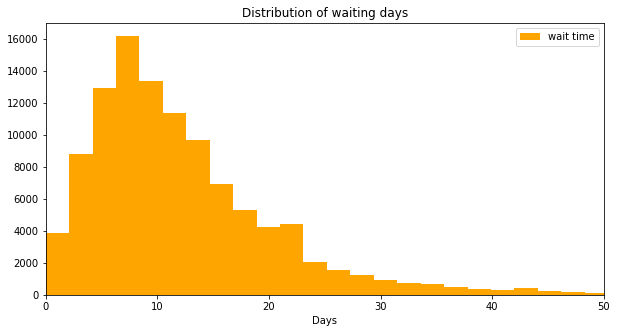

In [26]:
plt.figure(figsize = (10, 5))

plt.hist(data['wait_time'], bins = 100, color = 'orange', label = 'wait time')

plt.xlim(0, 50)
plt.title('Distribution of waiting days')
plt.xlabel('Days')
plt.legend()

plt.show()

### Explore Factors

In [27]:
daily_delivery = pd.DataFrame(data.set_index('delivered_date').resample('D').sum()['count'])

daily_delivery.loc[:, 'day_of_week'] = daily_delivery.index.dayofweek

In [28]:
daily_delivery

,count,day_of_week
delivered_date,,
2016-10-11,3,1
2016-10-12,0,2
2016-10-13,15,3
2016-10-14,17,4
2016-10-15,18,5
...,...,...
2018-10-13,0,5
2018-10-14,0,6
2018-10-15,0,0


In [29]:
daily_order = pd.DataFrame(data.set_index('order_date').resample('D').sum()['count'])

daily_order.loc[:, 'day_of_week'] = daily_order.index.dayofweek

In [30]:
daily_order

,count,day_of_week
order_date,,
2016-09-15,3,3
2016-09-16,0,4
2016-09-17,0,5
2016-09-18,0,6
2016-09-19,0,0
...,...,...
2018-08-25,71,5
2018-08-26,77,6
2018-08-27,68,0


In [33]:
import plotly.express as px

fig = px.scatter(daily_delivery, 
                 x=daily_delivery.index, 
                 y="count",
                 size = "count",
                 color = "day_of_week"
                )
fig.show()

In [34]:
import plotly.express as px

fig = px.scatter(daily_order, 
                 x=daily_order.index, 
                 y="count",
                 size = "count",
                 color = "day_of_week"
                )
fig.show()

### Feature Engineering

In [31]:
data.loc[:, 'day_of_week'] = data.order_date.dt.dayofweek

data.loc[:, 'month'] = data.order_date.dt.month

data.loc[:, 'year'] = data.order_date.dt.year

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [32]:
daily_delivery.reset_index(inplace = True)

In [33]:
daily_delivery.rename(columns = {'count':'count_delivered_day'}, inplace = True)

In [34]:
data = data.merge(daily_delivery[['delivered_date', 'count_delivered_day']],
                                                    on = 'delivered_date',
                                                    how = 'left')

In [35]:
daily_order.reset_index(inplace = True)

In [36]:
daily_order.rename(columns = {'count':'count_order_day'}, inplace = True)

In [37]:
data = data.merge(daily_order[['order_date', 'count_order_day']],
                                                    on = 'order_date',
                                                    how = 'left')

In [38]:
data

,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290
107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134
107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318
107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318


In [39]:
data.corr()

,product_volume_cm3,product_weight_g,wait_time,count,day_of_week,month,year,count_delivered_day,count_order_day
product_volume_cm3,1.000000,0.865044,0.069562,NaN,-0.020824,-0.000440,-0.031957,-0.027756,-0.012598
product_weight_g,0.865044,1.000000,0.075624,NaN,-0.017526,-0.008996,-0.017059,-0.018230,-0.007929
wait_time,0.069562,0.075624,1.000000,NaN,0.030198,-0.059110,-0.053572,0.002929,0.055001
count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,-0.020824,-0.017526,0.030198,NaN,1.000000,0.022870,-0.019552,-0.009286,-0.118434
month,-0.000440,-0.008996,-0.059110,NaN,0.022870,1.000000,-0.555080,-0.011891,0.120371
year,-0.031957,-0.017059,-0.053572,NaN,-0.019552,-0.555080,1.000000,0.556840,0.218044
count_delivered_day,-0.027756,-0.018230,0.002929,NaN,-0.009286,-0.011891,0.556840,1.000000,0.365573
count_order_day,-0.012598,-0.007929,0.055001,NaN,-0.118434,0.120371,0.218044,0.365573,1.000000


Text(0.5, 1.0, 'Correlation')

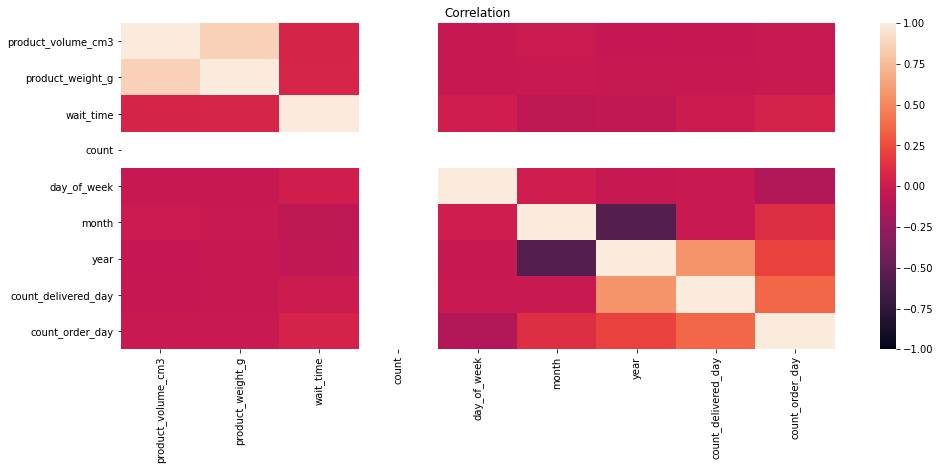

In [40]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1)

heatmap.set_title('Correlation')

### Baseline Score

Engineer a scoring metric that preserves the magnitude of the target and the direction of the errors made.

In [41]:
def directed_error(y, y_pred):
    return np.mean(y_pred - y)

y_base = (data['estimated_time_delivery'] - data['order_date']).dt.days

base_score = directed_error(data['wait_time'], y_base)

base_score

11.879840871099988

### MSE, RMSE, & MAE

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(data['wait_time'], y_base)
rmse = mean_squared_error(data['wait_time'], y_base, squared=False)
mae = mean_absolute_error(data['wait_time'], y_base)

print('MSE Base: ', mse)
print('RMSE Base: ', rmse)
print('MAE Base: ', mae)

MSE Base:  244.66256081730992
RMSE Base:  15.641693029122836
MAE Base:  13.300832064846894


#Modelling

### Model Selection

In [43]:
X = data[['customer_state', 'seller_state', 'product_volume_cm3', 'product_weight_g', 'day_of_week', 'year', 'month', 'count_delivered_day', 'count_order_day']]

y = data['wait_time']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107083 entries, 0 to 107082
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_state       107083 non-null  object 
 1   seller_state         107083 non-null  object 
 2   product_volume_cm3   107083 non-null  float64
 3   product_weight_g     107083 non-null  float64
 4   day_of_week          107083 non-null  int64  
 5   year                 107083 non-null  int64  
 6   month                107083 non-null  int64  
 7   count_delivered_day  107083 non-null  int64  
 8   count_order_day      107083 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 8.2+ MB


### Preprocessing Categorical Features

In [45]:
categorical_features = ['customer_state', 'seller_state', 
                        'year', 'month', 
                        'day_of_week']

X = pd.get_dummies(X, columns = categorical_features)

### Preprocessing Numerical Features

In [46]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['product_volume_cm3', 'product_weight_g', 'count_delivered_day', 'count_order_day']

X.loc[:, numerical_features] = MinMaxScaler().fit_transform(X[numerical_features])

### Copy the Data

In [47]:
data_copy = data.copy()

## Linear Regression

### Linear Regression without Hyperparameter Tuning

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

reg = LinearRegression()
y_reg_predcv = cross_val_predict(reg, X, y, cv=10)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_reg = mean_squared_error(y, y_reg_predcv)
rmse_reg = mean_squared_error(y, y_reg_predcv, squared=False)
mae_reg = mean_absolute_error(y, y_reg_predcv)

print('MSE for Linear Regression without hyperparameter tuning: ', mse_reg)
print('RMSE for Linear Regression without hyperparameter tuning: ', rmse_reg)
print('MAE for Linear Regression without hyperparameter tuning: ', mae_reg)

MSE for Linear Regression without hyperparameter tuning:  79.06541485911603
RMSE for Linear Regression without hyperparameter tuning:  8.891873529190349
MAE for Linear Regression without hyperparameter tuning:  5.81659162455868


In [54]:
print('Directed Error for Linear Regression without hyperparameter tuning: ', directed_error(y, y_reg_predcv))

Directed Error for Linear Regression without hyperparameter tuning:  0.00034942844970431815


In [55]:
predcv_reg = np.round(y_reg_predcv)
predcv_reg = pd.Series(predcv_reg)

In [56]:
predcv_reg

0          8.0
1         12.0
2         13.0
3         13.0
4         16.0
          ... 
107078    16.0
107079    11.0
107080    15.0
107081    15.0
107082    16.0
Length: 107083, dtype: float64

In [57]:
data_reg_predcv = pd.merge(data_copy, predcv_reg.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_reg.index)

In [58]:
data_reg_predcv['new_estimated_time_delivery'] = data_reg_predcv['order_date'] + pd.to_timedelta(data_reg_predcv['new_wait_time'], unit='d')

data_reg_predcv['delivery_time_difference'] = (data_reg_predcv['new_estimated_time_delivery'] - data_reg_predcv['delivered_date']).dt.days

In [59]:
data_reg_predcv['shipment_status'] = data_reg_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [60]:
data_reg_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,8.0,2017-10-10,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,12.0,2018-08-05,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,16.0,2018-02-22,-6,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE


In [61]:
import plotly.express as px

count_shipment_status = data_reg_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Linear Regression without Hyperparameter Tuning)'
)
fig.show()

### Linear Regression with Hyperparameter Tuning

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

reg = LinearRegression()

# Define the hyperparameters
reg_hyperparameters = dict()
reg_hyperparameters['fit_intercept'] = [True, False]
reg_hyperparameters['normalize'] = [True, False]
reg_hyperparameters['n_jobs'] = [-1, 1]
search_reg_hyperparameters = GridSearchCV(reg, reg_hyperparameters, cv=10)
reg_result = search_reg_hyperparameters.fit(X, y)

# Result
print('Best Score %s' % reg_result.best_score_)
print('Best Hyperparameters %s' % reg_result.best_params_)

Best Score 0.1283312506253364
Best Hyperparameters {'fit_intercept': False, 'n_jobs': -1, 'normalize': True}


In [63]:
from sklearn.linear_model import LinearRegression
reg_hp = LinearRegression(fit_intercept= False, n_jobs=-1, normalize= True)

In [64]:
from sklearn.model_selection import cross_val_predict
y_reghp_predcv = cross_val_predict(reg_hp, X, y, cv=10)

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_reg_hp = mean_squared_error(y, y_reghp_predcv)
rmse_reg_hp = mean_squared_error(y, y_reghp_predcv, squared=False)
mae_reg_hp = mean_absolute_error(y, y_reghp_predcv)

print('MSE for Linear Regression with hyperparameter tuning: ', mse_reg_hp)
print('RMSE for Linear Regression with hyperparameter tuning: ', rmse_reg_hp)
print('MAE for Linear Regression with hyperparameter tuning: ', mae_reg_hp)

MSE for Linear Regression with hyperparameter tuning:  79.06540262974436
RMSE for Linear Regression with hyperparameter tuning:  8.891872841519067
MAE for Linear Regression with hyperparameter tuning:  5.816624410834875


In [66]:
print('Directed Error for Linear Regression with hyperparameter tuning: ', directed_error(y, y_reghp_predcv))

Directed Error for Linear Regression with hyperparameter tuning:  0.0005024293976287487


In [67]:
predcv_reg_hp = np.round(y_reghp_predcv)
predcv_reg_hp = pd.Series(predcv_reg_hp)

In [68]:
predcv_reg_hp

0          8.0
1         12.0
2         13.0
3         13.0
4         16.0
          ... 
107078    16.0
107079    11.0
107080    15.0
107081    15.0
107082    16.0
Length: 107083, dtype: float64

In [69]:
data_reghp_predcv = pd.merge(data_copy, predcv_reg_hp.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_reg_hp.index)

In [70]:
data_reghp_predcv['new_estimated_time_delivery'] = data_reghp_predcv['order_date'] + pd.to_timedelta(data_reghp_predcv['new_wait_time'], unit='d')

data_reghp_predcv['delivery_time_difference'] = (data_reghp_predcv['new_estimated_time_delivery'] - data_reghp_predcv['delivered_date']).dt.days

In [71]:
data_reghp_predcv['shipment_status'] = data_reghp_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [72]:
data_reghp_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,8.0,2017-10-10,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,12.0,2018-08-05,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,16.0,2018-02-22,-6,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE


In [73]:
import plotly.express as px

count_shipment_status = data_reghp_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Linear Regression with Hyperparameter Tuning)'
)
fig.show()

## Ridge Regression

### Ridge Regression without Hyperparameter Tuning

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict

rdg = Ridge()
y_rdg_predcv = cross_val_predict(rdg, X, y, cv=10)

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_rdg = mean_squared_error(y, y_rdg_predcv)
rmse_rdg = mean_squared_error(y, y_rdg_predcv, squared=False)
mae_rdg = mean_absolute_error(y, y_rdg_predcv)

print('MSE for Ridge Regression without hyperparameter tuning: ', mse_rdg)
print('RMSE for Ridge Regression without hyperparameter tuning: ', rmse_rdg)
print('MAE for Ridge Regression without hyperparameter tuning: ', mae_rdg)

MSE for Ridge Regression without hyperparameter tuning:  79.06432300744419
RMSE for Ridge Regression without hyperparameter tuning:  8.891812132936918
MAE for Ridge Regression without hyperparameter tuning:  5.816592053403855


In [76]:
print('Directed Error for Ridge Regression without hyperparemeter tuning: ', directed_error(y, y_rdg_predcv))

Directed Error for Ridge Regression without hyperparemeter tuning:  0.0004913787464768097


In [78]:
predcv_rdg = np.round(y_rdg_predcv)
predcv_rdg = pd.Series(predcv_rdg)

In [79]:
predcv_rdg

0          8.0
1         12.0
2         13.0
3         13.0
4         16.0
          ... 
107078    16.0
107079    11.0
107080    15.0
107081    15.0
107082    16.0
Length: 107083, dtype: float64

In [80]:
data_rdg_predcv = pd.merge(data_copy, predcv_rdg.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_rdg.index)

In [81]:
data_rdg_predcv['new_estimated_time_delivery'] = data_rdg_predcv['order_date'] + pd.to_timedelta(data_rdg_predcv['new_wait_time'], unit='d')

data_rdg_predcv['delivery_time_difference'] = (data_rdg_predcv['new_estimated_time_delivery'] - data_rdg_predcv['delivered_date']).dt.days

In [82]:
data_rdg_predcv['shipment_status'] = data_rdg_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [83]:
data_rdg_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,8.0,2017-10-10,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,12.0,2018-08-05,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,16.0,2018-02-22,-6,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE


In [86]:
import plotly.express as px

count_shipment_status = data_rdg_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Ridge Regression without Hyperparameter Tuning)'
)
fig.show()

### Ridge Regression with Hyperparameter Tuning

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rdg = Ridge()

# Define the hyperparameters
rdg_hyperparameters = dict()
rdg_hyperparameters['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
rdg_hyperparameters['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
rdg_hyperparameters['fit_intercept'] = [True, False]
rdg_hyperparameters['normalize'] = [True, False]
search_rdg_hyperparameters = GridSearchCV(rdg, rdg_hyperparameters, cv=10)
rdg_result = search_rdg_hyperparameters.fit(X,y)

#Result
print('Best Score: %s' % rdg_result.best_score_)
print('Best Hyperparameters: %s' % rdg_result.best_params_)

Best Score: 0.1284226650278846
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'solver': 'svd'}


In [88]:
from sklearn.linear_model import Ridge
rdg_hp = Ridge(alpha=10, fit_intercept=True, normalize=False, solver= 'svd')

In [89]:
from sklearn.model_selection import cross_val_predict
y_rdghp_predcv = cross_val_predict(rdg_hp, X, y, cv=10)

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_rdg_hp = mean_squared_error(y, y_rdghp_predcv)
rmse_rdg_hp = mean_squared_error(y, y_rdghp_predcv, squared=False)
mae_rdg_hp = mean_absolute_error(y, y_rdghp_predcv)

print('MSE for Ridge Regression with hyperparameter tuning: ', mse_rdg_hp)
print('RMSE for Ridge Regression with hyperparameter tuning: ', rmse_rdg_hp)
print('MAE for Ridge Regression with hyperparameter tuning: ', mae_rdg_hp)

MSE for Ridge Regression with hyperparameter tuning:  79.05791039254639
RMSE for Ridge Regression with hyperparameter tuning:  8.891451534622814
MAE for Ridge Regression with hyperparameter tuning:  5.816416135900919


In [91]:
print('Directed Error for Ridge Regression with hyperparemeter tuning: ', directed_error(y, y_rdghp_predcv))

Directed Error for Ridge Regression with hyperparemeter tuning:  0.00039286445113793


In [92]:
predcv_rdg_hp = np.round(y_rdghp_predcv)
predcv_rdg_hp = pd.Series(predcv_rdg_hp)

In [93]:
predcv_rdg_hp

0          8.0
1         12.0
2         13.0
3         13.0
4         16.0
          ... 
107078    16.0
107079    11.0
107080    15.0
107081    15.0
107082    16.0
Length: 107083, dtype: float64

In [94]:
data_rdghp_predcv = pd.merge(data_copy, predcv_rdg_hp.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_rdg_hp.index)

In [95]:
data_rdghp_predcv['new_estimated_time_delivery'] = data_rdghp_predcv['order_date'] + pd.to_timedelta(data_rdghp_predcv['new_wait_time'], unit='d')

data_rdghp_predcv['delivery_time_difference'] = (data_rdghp_predcv['new_estimated_time_delivery'] - data_rdghp_predcv['delivered_date']).dt.days

In [96]:
data_rdghp_predcv['shipment_status'] = data_rdghp_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [97]:
data_rdghp_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,8.0,2017-10-10,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,12.0,2018-08-05,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,16.0,2018-02-22,-6,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE


In [98]:
import plotly.express as px

count_shipment_status = data_rdghp_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Ridge Regression with Hyperparameter Tuning)'
)
fig.show()

## Lasso Regression

### Lasso Regression without Hyperparameter Tuning

In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict

lsr = Lasso()
y_lsr_predcv = cross_val_predict(lsr, X, y, cv=10)

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_lsr = mean_squared_error(y, y_lsr_predcv)
rmse_lsr = mean_squared_error(y, y_lsr_predcv, squared=False)
mae_lsr = mean_absolute_error(y, y_lsr_predcv)

print('MSE for Lasso Regression without hyperparameter tuning: ', mse_lsr)
print('RMSE for Lasso Regression without hyperparameter tuning: ', rmse_lsr)
print('MAE for Lasso Regression without hyperparameter tuning: ', mae_lsr)

MSE for Lasso Regression without hyperparameter tuning:  90.71908223786426
RMSE for Lasso Regression without hyperparameter tuning:  9.524656541727069
MAE for Lasso Regression without hyperparameter tuning:  6.406244791614647


In [101]:
print('Directed Error for Lasso Regression without hyperparameter tuning: ', directed_error(y, y_lsr_predcv))

Directed Error for Lasso Regression without hyperparameter tuning:  9.715380220469766e-08


In [102]:
y_lsr_predcv

array([12.51522195, 12.51522195, 12.51522195, ..., 12.53039689,
       12.53039689, 12.53039689])

In [103]:
predcv_lsr = np.round(y_lsr_predcv)
predcv_lsr = pd.Series(predcv_lsr)

In [104]:
predcv_lsr

0         13.0
1         13.0
2         13.0
3         13.0
4         13.0
          ... 
107078    13.0
107079    13.0
107080    13.0
107081    13.0
107082    13.0
Length: 107083, dtype: float64

In [105]:
data_lsr_predcv = pd.merge(data_copy, predcv_lsr.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_lsr.index)

In [106]:
data_lsr_predcv['new_estimated_time_delivery'] = data_lsr_predcv['order_date'] + pd.to_timedelta(data_lsr_predcv['new_wait_time'], unit='d')

data_lsr_predcv['delivery_time_difference'] = (data_lsr_predcv['new_estimated_time_delivery'] - data_lsr_predcv['delivered_date']).dt.days

In [107]:
data_lsr_predcv['shipment_status'] = data_lsr_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [108]:
data_lsr_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,13.0,2017-10-15,5,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,13.0,2018-08-06,-1,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,13.0,2018-02-26,10,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,13.0,2018-02-19,-9,EXTREMELY LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,13.0,2017-09-09,-12,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,13.0,2018-01-21,-4,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,13.0,2018-01-21,-4,LATE


In [109]:
import plotly.express as px

count_shipment_status = data_lsr_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Lasso Regression without Hyperparameter Tuning)'
)
fig.show()

### Lasso Regression with Hyperparameter Tuning

In [110]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lsr = Lasso()

#Define the hyperparameters
lsr_hyperparameters = dict()
lsr_hyperparameters['selection'] = ['cyclic', 'random']
lsr_hyperparameters['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
lsr_hyperparameters['fit_intercept'] = [True, False]
lsr_hyperparameters['normalize'] = [True, False]
search_lsr_hyperparameters = GridSearchCV(lsr, lsr_hyperparameters, cv=10)
lsr_result = search_lsr_hyperparameters.fit(X,y)

#Result
print('Best Score: %s' % lsr_result.best_score_)
print('Best Hyperparameters: %s' % lsr_result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1801543.9309659642, tolerance: 881.7073169402585

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2099903.7935574334, tolerance: 872.848904240769

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1799242.8952334793, tolerance: 881.5560255546051

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2103639.9734191764, tolerance: 875.1875

Best Score: 0.1283760757177441
Best Hyperparameters: {'alpha': 0.001, 'fit_intercept': False, 'normalize': True, 'selection': 'random'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1691264.8345298795, tolerance: 2647.0129



In [111]:
from sklearn.linear_model import Lasso
lsr_hp = Lasso(alpha= 0.001, fit_intercept=False, normalize=True, selection= 'random', max_iter=10000)

In [112]:
from sklearn.model_selection import cross_val_predict
y_lsrhp_predcv = cross_val_predict(lsr_hp, X, y, cv=10)

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_lsr_hp = mean_squared_error(y, y_lsrhp_predcv)
rmse_lsr_hp = mean_squared_error(y, y_lsrhp_predcv, squared=False)
mae_lsr_hp = mean_absolute_error(y, y_lsrhp_predcv)

print('MSE for Lasso Regression with hyperparameter tuning: ', mse_lsr_hp)
print('RMSE for Lasso Regression with hyperparameter tuning: ', rmse_lsr_hp)
print('MAE for Lasso Regression with hyperparameter tuning: ', mae_lsr_hp)

MSE for Lasso Regression with hyperparameter tuning:  79.06205133985536
RMSE for Lasso Regression with hyperparameter tuning:  8.891684392726463
MAE for Lasso Regression with hyperparameter tuning:  5.815602206639116


In [114]:
print('Directed Error for Lasso Regression with hyperparameter tuning: ', directed_error(y, y_lsrhp_predcv))

Directed Error for Lasso Regression with hyperparameter tuning:  -0.002636696597975453


In [115]:
y_lsrhp_predcv

array([ 7.61693163, 12.33552599, 12.44865698, ..., 14.94195688,
       14.94195688, 16.01715939])

In [116]:
predcv_lsr_hp = np.round(y_lsrhp_predcv)
predcv_lsr_hp = pd.Series(predcv_lsr_hp)

In [117]:
predcv_lsr_hp

0          8.0
1         12.0
2         12.0
3         13.0
4         16.0
          ... 
107078    16.0
107079    11.0
107080    15.0
107081    15.0
107082    16.0
Length: 107083, dtype: float64

In [118]:
data_lsrhp_predcv = pd.merge(data_copy, predcv_lsr_hp.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_lsr_hp.index)

In [119]:
data_lsrhp_predcv['new_estimated_time_delivery'] = data_lsrhp_predcv['order_date'] + pd.to_timedelta(data_lsrhp_predcv['new_wait_time'], unit='d')

data_lsrhp_predcv['delivery_time_difference'] = (data_lsrhp_predcv['new_estimated_time_delivery'] - data_lsrhp_predcv['delivered_date']).dt.days

In [120]:
data_lsrhp_predcv['shipment_status'] = data_lsrhp_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [121]:
data_lsrhp_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,8.0,2017-10-10,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,12.0,2018-08-05,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,12.0,2018-08-20,3,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,16.0,2018-02-22,-6,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE


In [122]:
import plotly.express as px

count_shipment_status = data_lsrhp_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Lasso Regression with Hyperparameter Tuning)'
)
fig.show()

## Elastic Net Regression

### Elastic Net Regression without Hyperparameter Tuning

In [123]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_predict

enr = ElasticNet()
y_enr_predcv = cross_val_predict(enr, X, y, cv=10)

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_enr = mean_squared_error(y, y_enr_predcv)
rmse_enr = mean_squared_error(y, y_enr_predcv, squared=False)
mae_enr = mean_absolute_error(y, y_enr_predcv)

print('MSE for Elastic Net Regression without hyperparameter tuning: ', mse_enr)
print('RMSE for Elastic Net Regression without hyperparameter Tuning: ', rmse_enr)
print('MAE for Elastic Net Regression without Hyperparameter Tuning: ', mae_enr)

MSE for Elastic Net Regression without hyperparameter tuning:  90.25032408962853
RMSE for Elastic Net Regression without hyperparameter Tuning:  9.500017057333556
MAE for Elastic Net Regression without Hyperparameter Tuning:  6.382150168057148


In [125]:
print('Directed Error for Elastic Net Regression with hyperparameter tuning: ', directed_error(y, y_enr_predcv))

Directed Error for Elastic Net Regression with hyperparameter tuning:  6.658209179889073e-06


In [126]:
y_enr_predcv

array([12.24474011, 12.58900531, 12.58900531, ..., 12.60335439,
       12.60335439, 12.60335439])

In [134]:
predcv_enr = np.round(y_enr_predcv)
predcv_enr = pd.Series(predcv_enr)

In [135]:
predcv_enr

0         12.0
1         13.0
2         13.0
3         13.0
4         13.0
          ... 
107078    13.0
107079    13.0
107080    13.0
107081    13.0
107082    13.0
Length: 107083, dtype: float64

In [136]:
data_enr_predcv = pd.merge(data_copy, predcv_enr.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_enr.index)

In [137]:
data_enr_predcv['new_estimated_time_delivery'] = data_enr_predcv['order_date'] + pd.to_timedelta(data_enr_predcv['new_wait_time'], unit='d')

data_enr_predcv['delivery_time_difference'] = (data_enr_predcv['new_estimated_time_delivery'] - data_enr_predcv['delivered_date']).dt.days

In [138]:
data_enr_predcv['shipment_status'] = data_enr_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [139]:
data_enr_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,12.0,2017-10-14,4,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,13.0,2018-08-06,-1,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,13.0,2018-02-26,10,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,13.0,2018-02-19,-9,EXTREMELY LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,13.0,2017-09-09,-12,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,13.0,2018-01-21,-4,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,13.0,2018-01-21,-4,LATE


In [141]:
import plotly.express as px

count_shipment_status = data_enr_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Elastic Net Regression without Hyperparameter Tuning)'
)
fig.show()

### Elastic Net Regression with Hyperparameter Tuning

In [143]:
from numpy import arange
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

enr = ElasticNet()
# Define the hyperparameters
enr_hyperparameters = dict()
enr_hyperparameters['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
enr_hyperparameters['l1_ratio'] = arange(0, 1, 0.5)
search_enr_hyperparameters = GridSearchCV(enr, enr_hyperparameters, cv=10)
enr_result = search_enr_hyperparameters.fit(X,y)

#Result
print('Best Score: %s' % enr_result.best_score_)
print('Best Hyperparameters: %s' % enr_result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3834498.939791488, tolerance: 881.7073169402585

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796424.0377771934, tolerance: 872.848904240769

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3829293.9352043895, tolerance: 881.5560255546051

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3797895.16866505, tolerance: 875.1875501

Best Score: 0.12841975830982463
Best Hyperparameters: {'alpha': 0.0001, 'l1_ratio': 0.0}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 4221869.795619597, tolerance: 971.4163972413867



In [144]:
from sklearn.linear_model import ElasticNet
enr_hp = ElasticNet(alpha= 0.0001, l1_ratio= 0.0, max_iter= 10000)

In [145]:
from sklearn.model_selection import cross_val_predict
y_enrhp_predcv = cross_val_predict(enr_hp, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3836383.154523522, tolerance: 881.7073169402585

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3798316.5013838694, tolerance: 872.848904240769

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3831189.002893099, tolerance: 881.5560255546051

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3799745.8155550384, tolerance: 875.187550

In [146]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_enr_hp = mean_squared_error(y, y_enrhp_predcv)
rmse_enr_hp = mean_squared_error(y, y_enrhp_predcv, squared=False)
mae_enr_hp = mean_absolute_error(y, y_enrhp_predcv)

print('MSE for Elastic Net Regression with hyperparameter tuning: ', mse_enr_hp)
print('RMSE for Elastic Net Regression with hyperparameter tuning: ', rmse_enr_hp)
print('MAE for Elastic Regression sith hyperparameter tuning: ', mae_enr_hp)

MSE for Elastic Net Regression with hyperparameter tuning:  79.05807272238717
RMSE for Elastic Net Regression with hyperparameter tuning:  8.891460663039968
MAE for Elastic Regression sith hyperparameter tuning:  5.8164195506401235


In [147]:
print('Directed Error Elastic Net Regression with hyperparameter tuning: ', directed_error(y, y_enrhp_predcv))

Directed Error Elastic Net Regression with hyperparameter tuning:  0.0003963082646435816


In [148]:
y_enrhp_predcv

array([ 7.58183068, 12.40322649, 12.51665344, ..., 14.77412963,
       14.77412963, 15.98393721])

In [149]:
predcv_enr_hp = np.round(y_enrhp_predcv)
predcv_enr_hp = pd.Series(predcv_enr_hp)

In [150]:
predcv_enr_hp

0          8.0
1         12.0
2         13.0
3         13.0
4         16.0
          ... 
107078    16.0
107079    11.0
107080    15.0
107081    15.0
107082    16.0
Length: 107083, dtype: float64

In [151]:
data_enrhp_predcv = pd.merge(data_copy, predcv_enr_hp.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_enr_hp.index)

In [152]:
data_enrhp_predcv['new_estimated_time_delivery'] = data_enrhp_predcv['order_date'] + pd.to_timedelta(data_enrhp_predcv['new_wait_time'], unit='d')

data_enrhp_predcv['delivery_time_difference'] = (data_enrhp_predcv['new_estimated_time_delivery'] - data_enrhp_predcv['delivered_date']).dt.days

In [153]:
data_enrhp_predcv['shipment_status'] = data_enrhp_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [154]:
data_enrhp_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,8.0,2017-10-10,0,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,12.0,2018-08-05,-2,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,13.0,2018-08-21,4,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,13.0,2017-12-01,-1,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,16.0,2018-02-22,-6,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,15.0,2018-01-23,-2,LATE


In [155]:
import plotly.express as px

count_shipment_status = data_enrhp_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Elastic Net Regression with Hyperparameter Tuning)'
)
fig.show()

## Random Forest Regression

### Random Forest Regression without Hyperparameter Tuning

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

rfr = RandomForestRegressor()
y_rfr_predcv = cross_val_predict(rfr, X, y, cv=10)

In [157]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_rfr = mean_squared_error(y, y_rfr_predcv)
rmse_rfr = mean_squared_error(y, y_rfr_predcv, squared=False)
mae_rfr = mean_absolute_error(y, y_rfr_predcv)

print('MSE for Random Forest Regression without hyperparameter tuning: ', mse_rfr)
print('RMSE for Random Forest Regression without hyperparameter Tuning: ', rmse_rfr)
print('MAE for Random Forest Regression without Hyperparameter Tuning: ', mae_rfr)

MSE for Random Forest Regression without hyperparameter tuning:  35.116867742363276
RMSE for Random Forest Regression without hyperparameter Tuning:  5.925948678681184
MAE for Random Forest Regression without Hyperparameter Tuning:  3.0058594559271556


In [158]:
print('Directed Error for Random Forest Regression without hyperparameter tuning: ', directed_error(y, y_rfr_predcv))

Directed Error for Random Forest Regression without hyperparameter tuning:  -0.04457740813423243


In [159]:
y_rfr_predcv

array([ 7.27, 13.86,  9.  , ..., 14.24, 14.24,  7.82])

In [160]:
predcv_rfr = np.round(y_rfr_predcv)
predcv_rfr = pd.Series(predcv_rfr)

In [161]:
predcv_rfr

0          7.0
1         14.0
2          9.0
3         14.0
4          4.0
          ... 
107078    18.0
107079    10.0
107080    14.0
107081    14.0
107082     8.0
Length: 107083, dtype: float64

In [162]:
data_rfr_predcv = pd.merge(data_copy, predcv_rfr.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_rfr.index)

In [163]:
data_rfr_predcv['new_estimated_time_delivery'] = data_rfr_predcv['order_date'] + pd.to_timedelta(data_rfr_predcv['new_wait_time'], unit='d')

data_rfr_predcv['delivery_time_difference'] = (data_rfr_predcv['new_estimated_time_delivery'] - data_rfr_predcv['delivered_date']).dt.days

In [164]:
data_rfr_predcv['shipment_status'] = data_rfr_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [165]:
data_rfr_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,7.0,2017-10-09,-1,LATE
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,14.0,2018-08-07,0,NORMAL
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,9.0,2018-08-17,0,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,14.0,2017-12-02,0,NORMAL
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,4.0,2018-02-17,1,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,18.0,2018-02-24,-4,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,10.0,2017-09-06,-15,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,14.0,2018-01-22,-3,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,14.0,2018-01-22,-3,LATE


In [166]:
import plotly.express as px

count_shipment_status = data_rfr_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Random Forest Regression without Hyperparameter Tuning)'
)
fig.show()

### Random Forest with Hyperparameter Tuning

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
# Define the hyperparameters
rfr_hyperparameters = dict()
rfr_hyperparameters['n_estimators'] = [100, 200]
rfr_hyperparameters['max_features'] = ['auto', 'sqrt']
rfr_hyperparameters['max_depth'] = [1, 5, 10]
search_rfr_hyperparameters = GridSearchCV(rfr, rfr_hyperparameters, cv=10)
rfr_result = search_rfr_hyperparameters.fit(X,y)

#Result
print('Best Score: %s' % rfr_result.best_score_)
print('Best Hyperparameters: %s' % rfr_result.best_params_)

Best Score: 0.2739414151834441
Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}


In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr_hp = RandomForestRegressor(n_estimators=200, max_features= 'auto', max_depth= 10)

In [49]:
from sklearn.model_selection import cross_val_predict
y_rfrhp_predcv = cross_val_predict(rfr_hp, X, y, cv=10)

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse_rfr_hp = mean_squared_error(y, y_rfrhp_predcv)
rmse_rfr_hp = mean_squared_error(y, y_rfrhp_predcv, squared=False)
mae_rfr_hp = mean_absolute_error(y, y_rfrhp_predcv)

print('MSE for Random Forest with hyperparameter tuning: ', mse_rfr_hp)
print('RMSE for Random Forest Regression with hyperparameter tuning: ', rmse_rfr_hp)
print('MAE for Random Forest sith hyperparameter tuning: ', mae_rfr_hp)

MSE for Random Forest with hyperparameter tuning:  65.77080281866354
RMSE for Random Forest Regression with hyperparameter tuning:  8.109920025417239
MAE for Random Forest sith hyperparameter tuning:  5.260025108357489


In [51]:
print('Directed Error Random Forest with hyperparameter tuning: ', directed_error(y, y_rfrhp_predcv))

Directed Error Random Forest with hyperparameter tuning:  -0.03436609305257325


In [52]:
y_rfrhp_predcv

array([ 9.72838177,  9.64051362,  9.29949055, ..., 16.25353361,
       16.25353361, 13.94830994])

In [53]:
predcv_rfr_hp = np.round(y_rfrhp_predcv)
predcv_rfr_hp = pd.Series(predcv_rfr_hp)

In [54]:
predcv_rfr_hp

0         10.0
1         10.0
2          9.0
3         12.0
4         16.0
          ... 
107078    17.0
107079    11.0
107080    16.0
107081    16.0
107082    14.0
Length: 107083, dtype: float64

In [55]:
data_rfrhp_predcv = pd.merge(data_copy, predcv_rfr_hp.rename('new_wait_time'), how = 'inner', left_on = data_copy.index, right_on = predcv_rfr_hp.index)

In [56]:
data_rfrhp_predcv['new_estimated_time_delivery'] = data_rfrhp_predcv['order_date'] + pd.to_timedelta(data_rfrhp_predcv['new_wait_time'], unit='d')

data_rfrhp_predcv['delivery_time_difference'] = (data_rfrhp_predcv['new_estimated_time_delivery'] - data_rfrhp_predcv['delivered_date']).dt.days

In [57]:
data_rfrhp_predcv['shipment_status'] = data_rfrhp_predcv['delivery_time_difference'].apply(lambda x: 'EXTREMELY EARLY' if x >= 14 else ('EARLY' if x>= 7 else ('NORMAL' if x>= 0 else ('LATE' if x>= -7 else 'EXTREMELY LATE'))))

In [58]:
data_rfrhp_predcv

,key_0,order_id,order_date,delivered_date,customer_state,seller_state,product_volume_cm3,product_weight_g,wait_time,estimated_time_delivery,count,day_of_week,month,year,count_delivered_day,count_order_day,new_wait_time,new_estimated_time_delivery,delivery_time_difference,shipment_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,2017-10-10,BANTEN,JAWA TENGAH,1976.0,500.0,8,2017-10-18,1,0,10,2017,218,164,10.0,2017-10-12,2,NORMAL
1,1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24,2018-08-07,JAMBI,JAWA TIMUR,4693.0,400.0,14,2018-08-13,1,1,7,2018,371,277,10.0,2018-08-03,-4,LATE
2,2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,2018-08-17,SUMATERA SELATAN,SULAWESI SELATAN,9576.0,420.0,9,2018-09-04,1,2,8,2018,410,347,9.0,2018-08-17,0,NORMAL
3,3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,2017-12-02,SULAWESI SELATAN,BANTEN,6000.0,450.0,14,2017-12-15,1,5,11,2017,134,159,12.0,2017-11-30,-2,LATE
4,4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,2018-02-16,JAWA BARAT,JAWA BARAT,11475.0,250.0,3,2018-02-26,1,1,2,2018,374,251,16.0,2018-03-01,13,EARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107078,107078,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,2018-02-28,JAWA TIMUR,KALIMANTAN TENGAH,16000.0,4950.0,22,2018-03-02,1,1,2,2018,334,290,17.0,2018-02-23,-5,LATE
107079,107079,83c1379a015df1e13d02aae0204711ab,2017-08-27,2017-09-21,KALIMANTAN TENGAH,BANTEN,63360.0,13300.0,25,2017-09-27,1,6,8,2017,173,134,11.0,2017-09-07,-14,EXTREMELY LATE
107080,107080,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,16.0,2018-01-24,-1,LATE
107081,107081,11c177c8e97725db2631073c19f07b62,2018-01-08,2018-01-25,JAWA BARAT,SULAWESI TENGAH,16000.0,13100.0,17,2018-02-15,1,0,1,2018,314,318,16.0,2018-01-24,-1,LATE


In [59]:
import plotly.express as px

count_shipment_status = data_rfrhp_predcv.groupby('shipment_status')['count'].sum().reset_index()

fig = px.bar(count_shipment_status, x='shipment_status', y='count')
fig.update_layout(
    title = 'Count Number of Shipment Status (Random Forest Regression with Hyperparameter Tuning)'
)
fig.show()

# Discussion

From the model, we can recap the result in tabel below:

Model                  | Directed Error       |MSE             |RMSE                  |MAE
-----------------------|----------------------|---------------|-----------------------|----------------|
Original Data|11.879840871099988|244.66256081730992|15.641693029122836|13.300832064846894
Linear Regression without Hyperparameter Tuning|0.00034942844970431815|79.06541485911603|8.891873529190349|5.81659162455868
Linear Regression with Hyperparameter Tuning |0.0005024293976287487|79.06540262974436|8.891872841519067|5.816624410834875
Ridge Regression  without Hyperparameter Tuning| 0.0004913787464768097|79.06432300744419         |8.891812132936918|5.816592053403855
Ridge Regression with Hyperparameter Tuning|0.00039286445113793|79.05791039254639|8.891451534622814|5.816416135900919
Lasso Regression without Hyperparameter Tuning|9.715380220469766e-08|90.71908223786426|9.524656541727069|6.406244791614647
Lasso Regression with Hyperparameter Tuning|-0.002636696597975453|79.06205133985536|8.89168439272646|5.815602206639116
Elastic Net Regression without Hyperparameter Tuning| 6.658209179889073e-06|90.25032408962853|9.500017057333556|6.382150168057148
Elastic Net Regression with Hyperparameter Tuning|0.0003963082646435816|79.05807272238717|8.891460663039968|5.8164195506401235
Random Forest Regression without Hyperparameter Tuning| -0.04457740813423243|35.116867742363276|5.925948678681184|3.0058594559271556
Random Forest Regression with Hyperparameter Tuning|-0.03436609305257325|65.77080281866354|8.109920025417239|5.260025108357489


